In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# 1. 数据检视

In [49]:
#读取数据集
df = pd.read_csv('train_split.csv',index_col = None)
#查看数据集信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       23413 non-null  object 
 5   SSN                       23413 non-null  object 
 6   Occupation                23413 non-null  object 
 7   Annual_Income             23413 non-null  object 
 8   Monthly_Inhand_Salary     19832 non-null  float64
 9   Num_Bank_Accounts         23413 non-null  int64  
 10  Num_Credit_Card           23413 non-null  int64  
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               23413 non-null  object 
 13  Type_of_Loan              21019 non-null  object 
 14  Delay_

# 2. 数据清洗

## 2.1 缺失值，异常值 处理

### 1.Age
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 年龄必须大于0且小于100 数据集中出现大量负数和大于100的值当作异常值处理
3. 将数据类型转换为int（由于数据集中存在字符串由pandas读入类型为object）

In [50]:
#Age

#将Age转化为String类型
df['Age'] = df['Age'].astype(str)

#将Age中的带'_'的值去除'_'
df['Age'] = df['Age'].str.replace('_', '')

#将Age变为int类型
df['Age'] = df['Age'].astype(pd.Int64Dtype())

#将Age中小于等于0和超过100的值替换为NaN
df['Age'] = df['Age'].where(df['Age'] <= 100, np.nan)
df['Age'] = df['Age'].where(df['Age'] > 0, np.nan)

df['Age']

0        18
1        31
2        37
3        33
4        18
         ..
23408    38
23409    37
23410    33
23411    32
23412    41
Name: Age, Length: 23413, dtype: Int64

### 2. Occupation
1. "_______"是一个缺失值
    使用正则匹配的方式，替换成NaN

In [51]:
#Occupation

#将Occupation中全为若干个'_'组成的值替换为NaN
df['Occupation'].replace('^_+$', np.nan, regex=True, inplace=True)

df['Occupation']

0              Manager
1             Mechanic
2             Musician
3               Doctor
4           Journalist
             ...      
23408    Media_Manager
23409         Musician
23410          Teacher
23411           Doctor
23412           Lawyer
Name: Occupation, Length: 23413, dtype: object

### 3. Annual_Income
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 将数据类型转换为float（保留两位小数）（由于数据集中存在字符串由pandas读入类型为object）

In [52]:
#Annual_Income

#将Annual_Income转化为String类型
df['Annual_Income'] = df['Annual_Income'].astype(str)

#将Annual_Income中的带'_'的值去除'_'
df['Annual_Income'] = df['Annual_Income'].str.replace('_', '')

#将Annual_Income变为float类型并保留两位小数
df['Annual_Income'] = df['Annual_Income'].astype(float)
df['Annual_Income'] = df['Annual_Income'].round(2)
df['Annual_Income']

0         31633.54
1         33446.44
2         21212.42
3         60938.13
4         73057.16
           ...    
23408     57810.68
23409     15597.31
23410    179948.84
23411      7821.24
23412     20889.65
Name: Annual_Income, Length: 23413, dtype: float64

### 4. Monthly_Inhand_Salary

In [53]:
#Monthly_Inhand_Salary

#将Monthly_Inhand_Salary保留两位小数
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].round(2)

df['Monthly_Inhand_Salary']

0         2930.13
1             NaN
2         1910.70
3         5163.18
4         5998.10
           ...   
23408     4896.56
23409     1456.78
23410    14836.74
23411      468.77
23412     1710.80
Name: Monthly_Inhand_Salary, Length: 23413, dtype: float64

### 5. Num_Bank_Accounts
1. 去除负数（账户数不可能为负数）
2. 怀疑过多的银行账户是异常值，计算超过num的值所占百分比
   在num = 1000时仍有0.52%（大约121个人）
   查找资料发现美国银行数有5000家以上
   综上，认为是合理的，不予处理

In [54]:
# 去除负数
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].where(df['Num_Bank_Accounts'] >= 0, np.nan)

In [55]:
# Num_Bank_Accounts
num = 1000

# 计算 Num_Bank_Accounts中大于 20 的数据的个数
count = df['Num_Bank_Accounts'][df['Num_Bank_Accounts'] > num].count()

# 计算 Num_Bank_Accounts中数据的总个数
total = df['Num_Bank_Accounts'].count()

# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的数据占 {percentage:.2f}%')


大于 1000 的数据占 0.52%


In [56]:
# 在数据预览时发现此行的Num_Credit_Card值为-1
x = df.loc[2334]
x
# 通过观察已成功改变

ID                                                    0xc7bd
Customer_ID                                       CUS_0x4f2a
Month                                                 August
Name                                               Margaretf
Age                                                       40
SSN                                              807-03-5415
Occupation                                          Engineer
Annual_Income                                     22136920.0
Monthly_Inhand_Salary                                    NaN
Num_Bank_Accounts                                        NaN
Num_Credit_Card                                            6
Interest_Rate                                              1
Num_of_Loan                                                2
Type_of_Loan                    Auto Loan, and Not Specified
Delay_from_due_date                                       10
Num_of_Delayed_Payment                                     6
Changed_Credit_Limit    

### 6. Num_Credit_Card
1. 去除负数（信用卡数不可能为负数）
2. 怀疑过多的信用卡数是异常值，计算超过num的值所占百分比
   在num = 1000时仍有0.82%（大约191个人）
   查找资料发现美国银行数有5000家以上
   综上，认为是合理的，不予处理

In [57]:
# 去除负数
df['Num_Credit_Card'] = df['Num_Credit_Card'].where(df['Num_Credit_Card'] >= 0, np.nan)

In [58]:
#Num_Credit_Card
num = 1000

# 计算 Num_Bank_Accounts中大于 20 的数据的个数
count = df['Num_Credit_Card'][df['Num_Credit_Card'] > num].count()

# 计算 Num_Bank_Accounts中数据的总个数
total = df['Num_Credit_Card'].count()

# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的数据占 {percentage:.2f}%')

大于 1000 的数据占 0.82%


### 7. Interest_Rate
1. 怀疑超过100是异常值,但是经过统计
   人数： 469
   大于 100 的数据占 2.00%
   暂时不予处理

In [59]:
# Interest_Rate

num = 100

# 计算 Interest_Rate中大于 100 的数据的个数
count = df['Interest_Rate'][df['Interest_Rate'] > num].count()

# 计算 Interest_Rate中数据的总个数
total = df['Interest_Rate'].count()
print(f'人数： {count}')
# 计算百分比
percentage = count / total * 100

# 打印结果
print(f'大于 {num} 的数据占 {percentage:.2f}%')


人数： 469
大于 100 的数据占 2.00%


### 8. Num_of_Loan
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 贷款数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN
3. 怀疑大于100的值为异常值，通过与Type_of_Loan对应，发现过大的Num_of_Loan是异常值，替换为NaN
4. 将数据类型转换为int（由于数据集中存在字符串由pandas读入类型为object）

In [60]:
# Num_of_Loan

#将Num_of_Loan转化为String类型
df['Num_of_Loan'] = df['Num_of_Loan'].astype(str)

#将Age中的带'_'的值去除'_'
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')

#将Num_of_Loan变为int类型
df['Num_of_Loan'] = df['Num_of_Loan'].astype(pd.Int64Dtype())

#将Num_of_Loan中小于0值替换为NaN
df['Num_of_Loan'] = df['Num_of_Loan'].where(df['Num_of_Loan'] >= 0, np.nan)

df['Num_of_Loan']



0        3
1        6
2        4
3        8
4        2
        ..
23408    4
23409    5
23410    3
23411    6
23412    5
Name: Num_of_Loan, Length: 23413, dtype: Int64

In [61]:
x = df.loc[487]
x

ID                                                                    0x17866
Customer_ID                                                        CUS_0xab37
Month                                                                     May
Name                                                             Tarmo Virkip
Age                                                                        42
SSN                                                               619-06-3124
Occupation                                                             Lawyer
Annual_Income                                                         70956.8
Monthly_Inhand_Salary                                                 6064.07
Num_Bank_Accounts                                                         6.0
Num_Credit_Card                                                             6
Interest_Rate                                                            2278
Num_of_Loan                                                     

In [62]:
# 查看 Num_of_Loan 大于等于 200 的行
# 筛选条件
condition = df['Num_of_Loan'] >= 200

# 应用筛选条件并获取符合条件的行数据
filtered_data = df[condition]

filtered_data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
68,0x1a924,CUS_0x804d,March,Johni,23,201-52-2520,Architect,21897.50,1986.79,1.0,...,Good,630.68,33.305599,NaN,No,15.487464,33.43919969692089,High_spent_Large_value_payments,389.75254484189935,Good
669,0x3af2,CUS_0x74d5,January,Mortimerz,25,432-94-4099,Lawyer,20821.80,2010.15,5.0,...,Good,1485.97,36.990987,26 Years and 9 Months,NM,21.189697,__10000__,Low_spent_Small_value_payments,242.5757749251817,Poor
854,0x1f164,CUS_0x990,July,Dhanyai,19,655-92-9108,Developer,18937.61,1536.13,8.0,...,_,1306.3,31.886706,15 Years and 4 Months,Yes,80.208365,27.515445030870843,High_spent_Medium_value_payments,295.8896070880838,Poor
1125,0xcb26,CUS_0x6c27,May,Hideyukic,19,297-05-8610,Journalist,56797.38,4784.12,6.0,...,Standard,2279.72,37.030462,16 Years and 3 Months,Yes,141.721835,302.8541038952459,Low_spent_Large_value_payments,303.83556071656346,Poor
1525,0x236b,CUS_0x409e,February,James Pomfretu,23,088-38-3435,Manager,47275.96,4238.66,6.0,...,Good,302.1,34.883541,22 Years and 3 Months,No,121.928877,469.7323729838309,Low_spent_Small_value_payments,122.20508315395494,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21914,0x11f90,CUS_0x47fe,March,Egenterq,21,740-19-9586,NaN,7085.39,668.45,9.0,...,Bad,3988.68,35.074456,13 Years and 3 Months,Yes,25.989110,19.442465214926113,Low_spent_Medium_value_payments,301.4133414733218,Poor
22992,0x7f36,CUS_0x3475,May,NaN,27,271-20-5461,NaN,36783.38,3151.28,10.0,...,Bad,4555.72,27.449575,1 Years and 9 Months,Yes,33421.000000,124.78002159848414,Low_spent_Small_value_payments,331.99002729881545,Poor
23048,0x6cfd,CUS_0x1410,August,NaN,43,087-58-6247,Teacher,96882.93,8229.58,5.0,...,Good,355.41,27.312835,NaN,NM,73.173723,180.20040454139752,High_spent_Large_value_payments,809.5836221743716,Poor
23232,0x183ec,CUS_0x317e,March,Jennifery,18,527-06-4214,Mechanic,62008.35,5256.36,10.0,...,Standard,2360.12,38.523179,NaN,Yes,127.392147,179.39112720340634,High_spent_Medium_value_payments,468.8529757445841,Poor


In [63]:
# 查看 Num_of_Loan 的中位数和众数
# 获取列的众数
mode = df['Num_of_Loan'].mode()
print("Mode:")
print(mode)

# 获取列的中位数
median = df['Num_of_Loan'].median()
print("Median:")
print(median)


Mode:
0    2
Name: Num_of_Loan, dtype: Int64
Median:
4.0


### 9. Type_of_Loan


In [64]:
# Type_of_Loan

### 10. Delay_from_due_date
1.  从付款日期延迟的平均天数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN

In [65]:
# Delay_from_due_date

# 将Delay_from_due_date中小于0值替换为NaN
df['Delay_from_due_date'] = df['Delay_from_due_date'].where(df['Delay_from_due_date'] >= 0, np.nan)

### 11. Num_of_Delayed_Payment
1. 延迟付款次数必须大于等于0 数据集中出现大量负数当作异常值处理，替换成NaN
2. 将带有若干'_'的值去除所有'_'，保留数字

In [66]:
# Num_of_Delayed_Payment

# 将 NaN 替换为 -1
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(-1)

# 将Num_of_Delayed_Payment转化为String类型
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(str)

# Num_of_Delayed_Payment中的带'_'的值去除'_'
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace('_', '')

# 将列的数据类型更改为整数
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype(int)

# 将Num_of_Delayed_Payment中小于0值替换为NaN
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].where(df['Num_of_Delayed_Payment'] >= 0, np.nan)

### 12. Changed_Credit_Limit
1. 将为'_'的值替换为NaN
2. 检查数据发现所有数据绝对值都在100以内，不予处理
3. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [67]:
# Changed_Credit_Limit
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_',np.nan)

df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

### 13. Num_Credit_Inquiries

In [68]:
# Num_Credit_Inquiries

### 14. Credit_Mix
1. 将为'_'的值替换为NaN

In [69]:
# Credit_Mix

df['Credit_Mix'] = df['Credit_Mix'].replace('_',np.nan)



### 15. Outstanding_Debt
1. 将带有若干'_'的值去除所有'_'，保留数字
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [70]:
# Outstanding_Debt

# 将Outstanding_Debt转化为String类型
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(str)

# Outstanding_Debt中的带'_'的值去除'_'
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')

# 将列的数据类型更改为整数
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype(float)

### 16. Credit_Utilization_Ratio

In [71]:
# Credit_Utilization_Ratio

### 17. Credit_History_Age

In [72]:
# Credit_History_Age

### 18. Payment_of_Min_Amount

In [73]:
# Payment_of_Min_Amount

### 19. Total_EMI_per_month

In [74]:
# Total_EMI_per_month

### 20. Amount_invested_monthly
1. 将'_10000_'替换为'10000'
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [75]:
# Amount_invested_monthly

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('__10000__','10000')

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype(float)

### 21. Payment_Behaviour
1. 将'!@9#%8'转换为NaN

In [76]:
# Payment_Behaviour

df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8',np.nan)

### 22. Monthly_Balance
1. 将'__-333333333333333333333333333__'转换为NaN
2. 将数据类型转换为float（由于数据集中存在字符串由pandas读入类型为object）

In [77]:
# Monthly_Balance

df['Monthly_Balance'] = df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)

df['Monthly_Balance'] = df['Monthly_Balance'].astype(float)

### 23. Credit_Score

In [78]:
# Credit_Score

In [79]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
missing_data

,Total,Percent
Credit_Mix,4779,0.204117
Monthly_Inhand_Salary,3581,0.152949
Name,2394,0.102251
Type_of_Loan,2394,0.102251
Credit_History_Age,2143,0.091530
Num_of_Delayed_Payment,1829,0.078119
Payment_Behaviour,1764,0.075343
Occupation,1638,0.069961
Amount_invested_monthly,1109,0.047367
Num_of_Loan,965,0.041216


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23413 entries, 0 to 23412
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        23413 non-null  object 
 1   Customer_ID               23413 non-null  object 
 2   Month                     23413 non-null  object 
 3   Name                      21019 non-null  object 
 4   Age                       22741 non-null  Int64  
 5   SSN                       23413 non-null  object 
 6   Occupation                21775 non-null  object 
 7   Annual_Income             23413 non-null  float64
 8   Monthly_Inhand_Salary     19832 non-null  float64
 9   Num_Bank_Accounts         23404 non-null  float64
 10  Num_Credit_Card           23413 non-null  int64  
 11  Interest_Rate             23413 non-null  int64  
 12  Num_of_Loan               22448 non-null  Int64  
 13  Type_of_Loan              21019 non-null  object 
 14  Delay_

In [81]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x2184,CUS_0xab00,July,Markx,18,468-20-7719,Manager,31633.54,2930.13,1.0,...,Good,846.45,37.934665,22 Years and 2 Months,No,50.768440,275.759795,Low_spent_Medium_value_payments,246.484598,Poor
1,0x196a2,CUS_0x5fe0,May,Erwin Sebae,31,032-10-6627,Mechanic,33446.44,NaN,6.0,...,NaN,2953.68,37.895848,9 Years and 7 Months,Yes,133.355905,93.650442,Low_spent_Large_value_payments,348.813987,Poor
2,0x1e96c,CUS_0xc301,July,NaN,37,169-93-9953,Musician,21212.42,1910.70,1.0,...,NaN,479.83,36.491037,23 Years and 1 Months,No,50.305036,172.477693,Low_spent_Large_value_payments,238.287438,Good
3,0x1b8a,CUS_0x1288,January,Taylorq,33,609-85-2725,Doctor,60938.13,5163.18,10.0,...,Bad,3947.24,21.744884,4 Years and 10 Months,Yes,378.304673,166.487676,High_spent_Small_value_payments,231.525401,Poor
4,0x24b9d,CUS_0x899,April,Klaymanm,18,797-96-0406,Journalist,73057.16,5998.10,4.0,...,Standard,2569.09,27.350833,9 Years and 6 Months,Yes,91.354188,66.232154,High_spent_Medium_value_payments,692.223325,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23408,0x18db8,CUS_0x269d,March,Lukef,38,415-10-2620,Media_Manager,57810.68,4896.56,7.0,...,Good,1419.99,27.141606,30 Years and 4 Months,No,131.871482,416.933866,Low_spent_Small_value_payments,230.850318,Good
23409,0x1304e,CUS_0x8e50,May,Sinead Carewp,37,052-30-0753,Musician,15597.31,1456.78,8.0,...,Standard,741.46,32.418000,5 Years and 6 Months,Yes,45.804440,142.100773,Low_spent_Medium_value_payments,237.772370,Good
23410,0x48f0,CUS_0x62e9,July,Woodallf,33,678-34-4743,Teacher,179948.84,14836.74,0.0,...,Good,1104.31,31.508604,31 Years and 8 Months,No,446.259347,10000.000000,Low_spent_Large_value_payments,309.497362,Poor
23411,0x1ff8,CUS_0x3ef5,July,NaN,32,259-09-9023,Doctor,7821.24,468.77,8.0,...,Bad,2924.76,33.575214,10 Years and 3 Months,Yes,19.727923,20.269324,Low_spent_Medium_value_payments,286.879752,Poor


## 2.2 缺失值，异常值填充

### 2.1 数值属性处理

绘制数值属性的直方图以及核密度曲线

In [83]:
def plot_histogram_without_nan(column_name, data_frame):
    plt.figure(figsize=(8, 6))
    sns.histplot(data_frame[column_name].dropna(), kde=True)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.title(f'Histogram of {column_name}')
    plt.show()

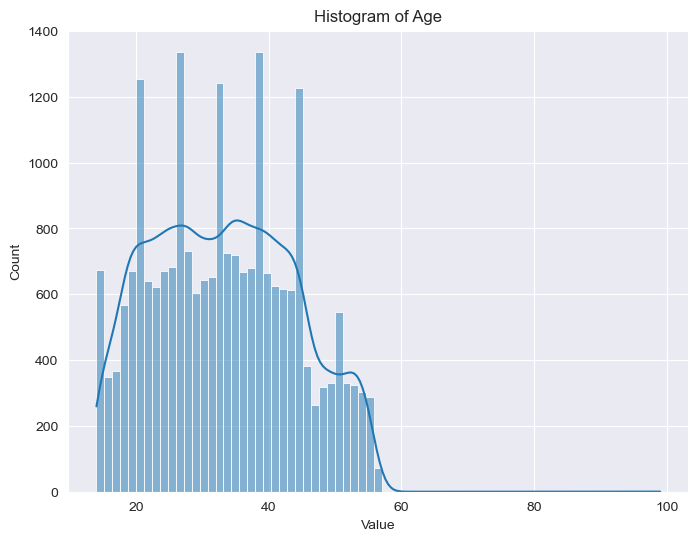

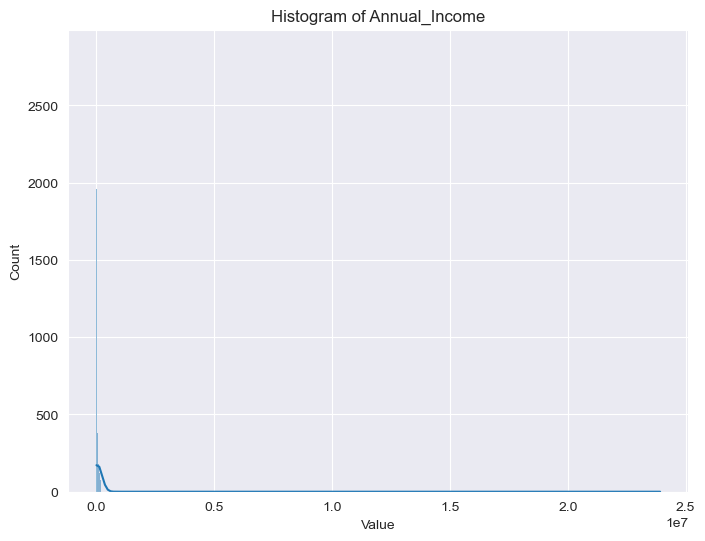

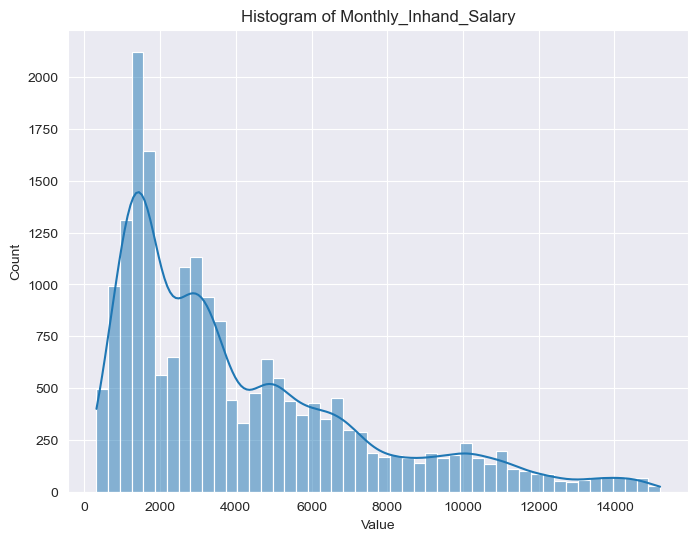

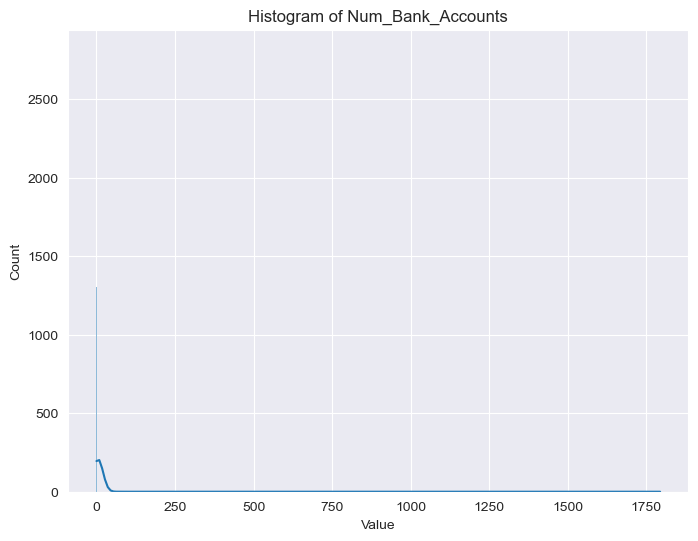

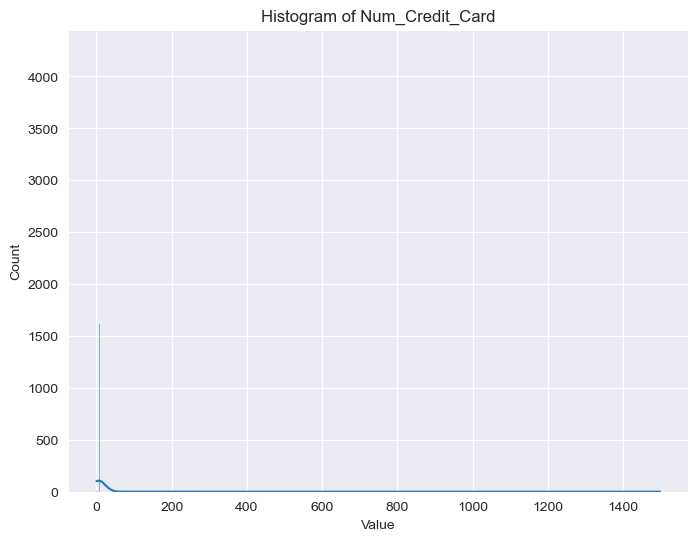

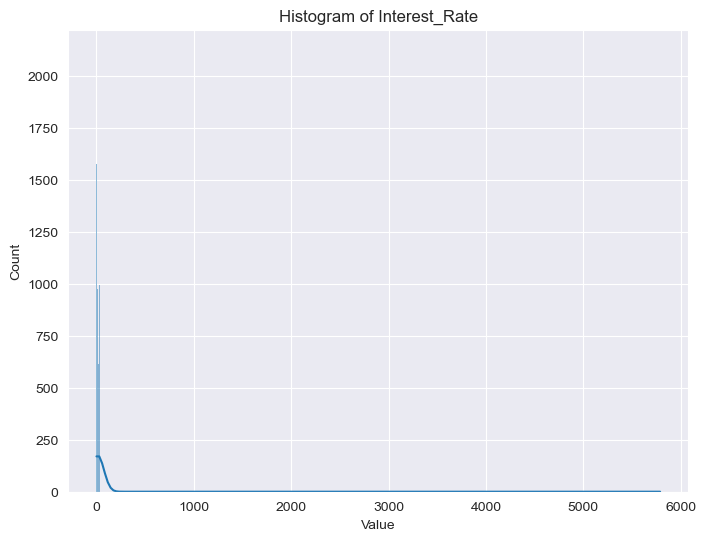

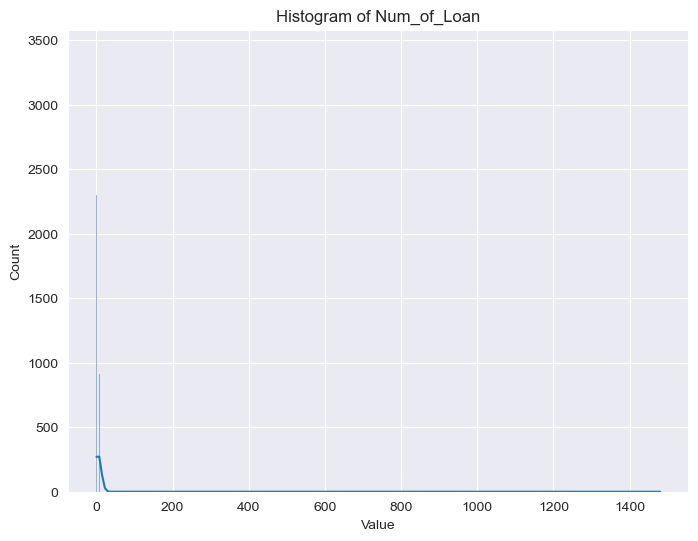

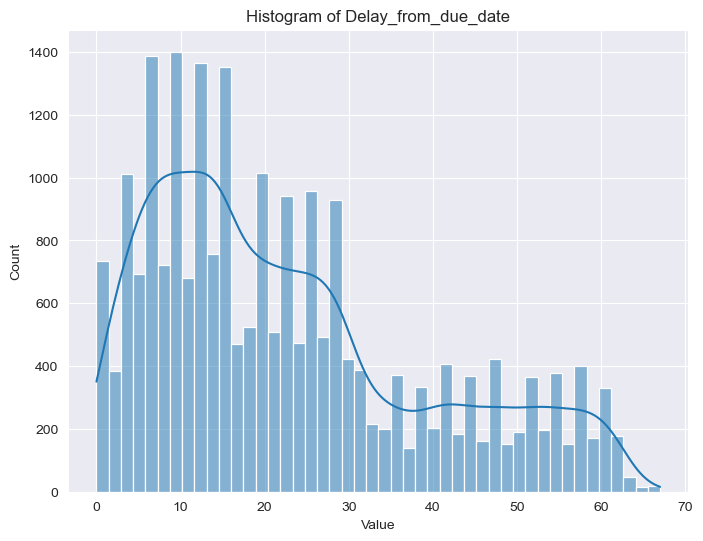

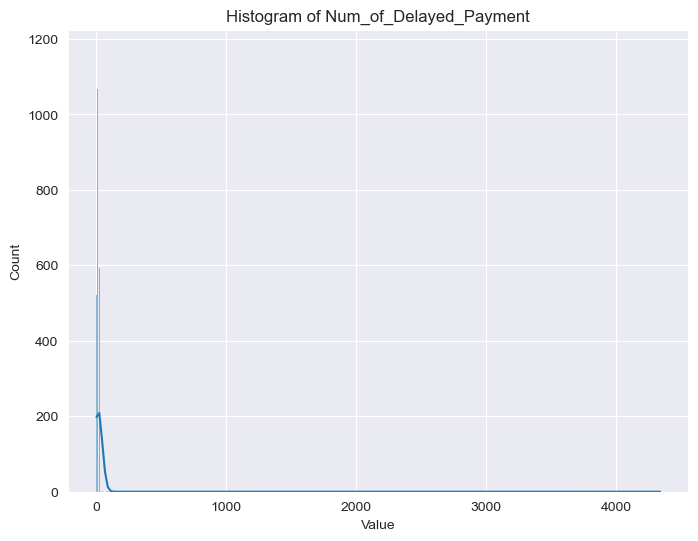

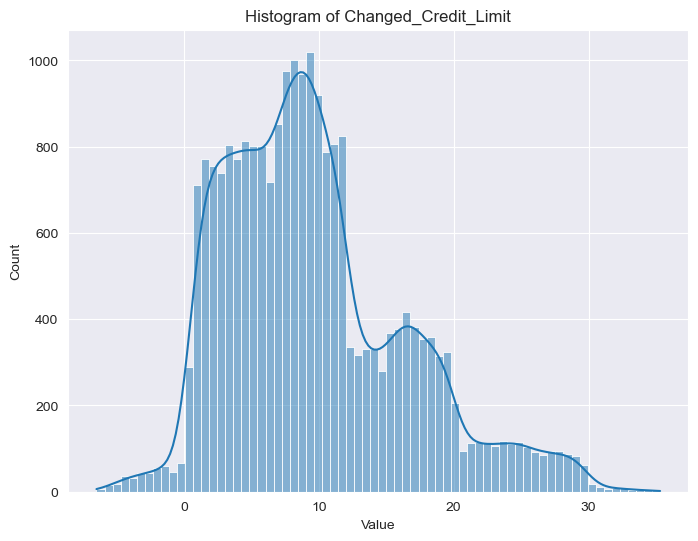

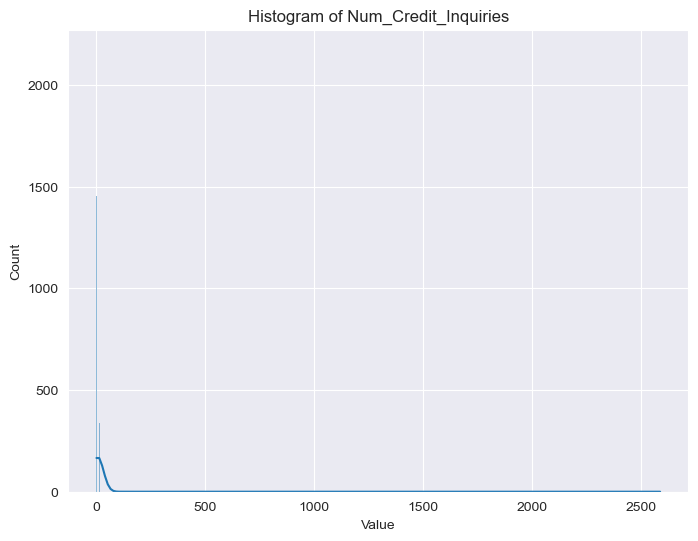

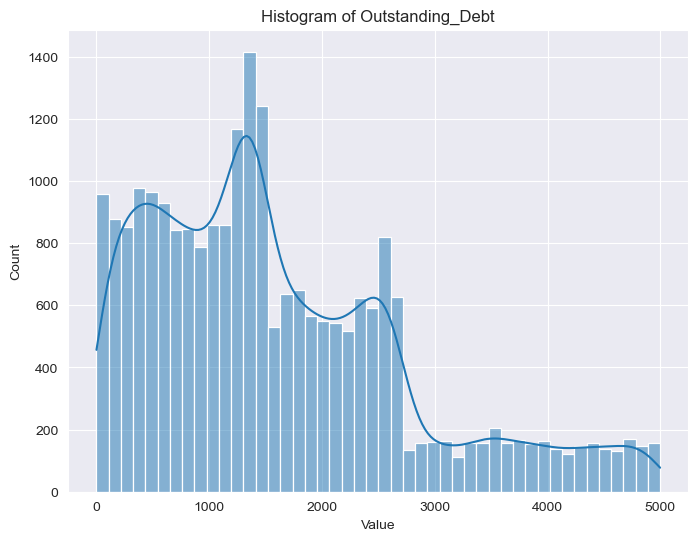

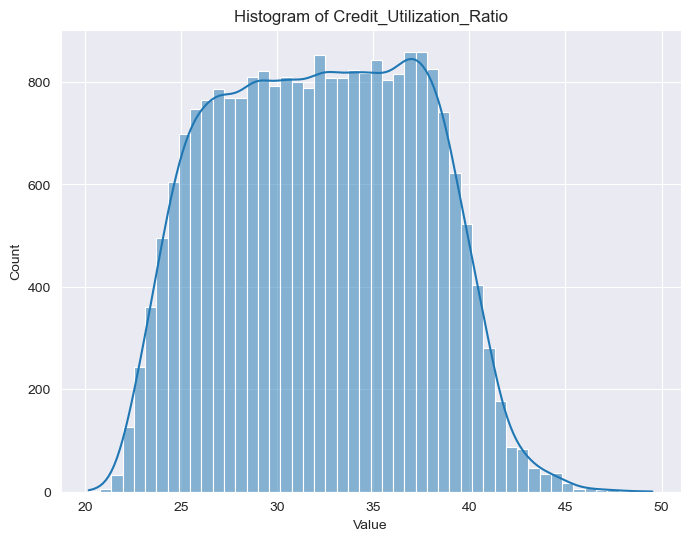

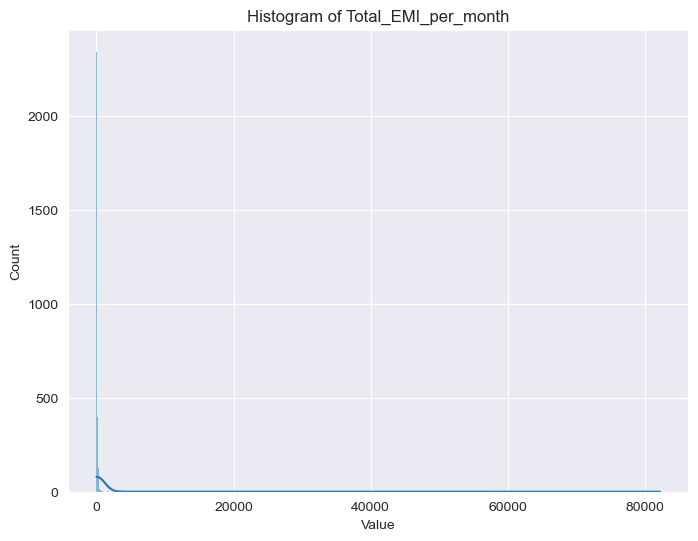

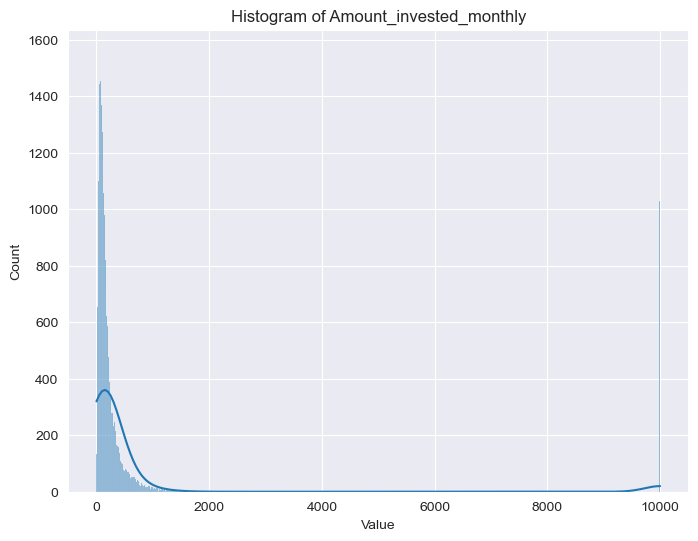

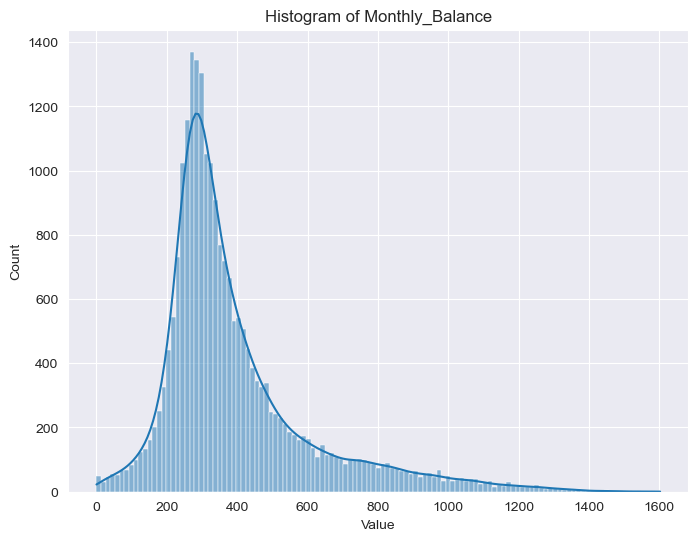

In [84]:
# 筛选出 int 和 float 类型的列
numeric_cols = df.select_dtypes(include=['int', 'float']).columns

# 循环调用绘制密度曲线的函数
for col in numeric_cols:
    plot_histogram_without_nan(col, df)

#### 1. age
根据直方图和核密度曲线， 使用xxx填充NaN